# CI project Experiment 4

## Group Member:
     Roham Haji Andevari
     Seyed Ahmad Hosseini
     Sepehr Ghalebi

## Superviser:
     Mr.Ramezan poor

#### _____________________________________________________________________________________________________________________________

### Description of the experiment
  In this experiment, we want to examine the K-Mean algorithm, after implementing the algorithm, we will test and
tThe applications and disadvantages of the algorithm are discussed

### Description of the K-Mean algorithm
  K-Means is an unsupervised machine learning algorithm used for clustering, where the goal is to group data points into K distinct clusters based on their features. It is particularly useful for discovering patterns and grouping unlabeled data.

#### How it works:
    1. Initialization: Select K initial centroids randomly from the dataset.
    2. Assign to Clusters: For each point, calculate the distance to all centroids and assign the point to the closest centroid.
    3. Update Centroids: Once all points are assigned, recompute the centroid of each cluster as the mean of the points in that cluster.
    4. Iterate: Repeat the process of assigning points and updating centroids until the cluster assignments stabilize (convergence) or a set number of iterations is reached.

#### Advantages:
    1.Simple and easy to implement.
    2.Scalable for large datasets.
    3.Fast and efficient.
    4.Interpretable clustering results.
    5.Flexible with different distance metrics.

#### Disadvantages:
    Requires predefined K.
    Sensitive to initialization and outliers.
    Assumes equal-sized, spherical clusters.
    Can get stuck in local optima..

# Describtion of the code

#### 1. Importing libraries:
    First of all we import Numpy library for our calculation and then we use the Matplotlib library to view the data and check how it is clustered, and we also use the data in Sklearn to generate samples in order to test our algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans

## K-Mean Code
  Now we want to create K-Mean class with the number of clusters (n_cluster) provided during initialization and after that the forward method calculates the Euclidean distance between each data point and all centroids and assigns each point to the nearest centroid  
  The fit method starts the clustering process, taking the input data x and then it randomly selects n_cluster points from the dataset as the initial centroids. For better calculation we iterate this algorithm 100 times.
  For each iteration, it assigns every data point to the closest centroid by calling the forward method and then it updates each centroid by calculating the mean of all points assigned to it
  

In [2]:
class Kmeans:
    def __init__(self, n_cluster):
        self.n_cluster = n_cluster

    def fit(self, x):
        index = np.random.choice(x.shape[0], self.n_cluster, replace = False)
        self.centroid = x[index]
        for i in range(0, 100):
            index = self.forward(x)
            for j in range(0, self.n_cluster):
                self.centroid[j] = np.mean(x[index == j], axis=0)

    def forward(self, x):
        norm = np.linalg.norm(np.expand_dims(x, 1) - np.expand_dims(self.centroid, 0), axis = -1)
        return np.argmin(norm, 1)

## Creating Data & Algorithm Testing
    Now according to Sklean's data we create some samples due to testing our algorithm

### Blobs

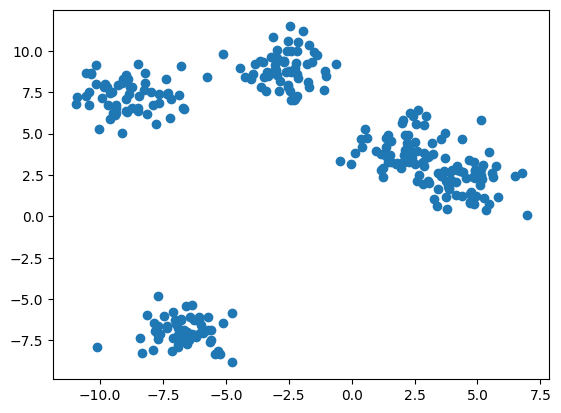

In [3]:
X, y = make_blobs(n_samples = 300, centers = 5, cluster_std = 1.0, random_state = 42)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Now we use K-Mean algorithm for 2, 3 and 4 clusters

### 3 cluster

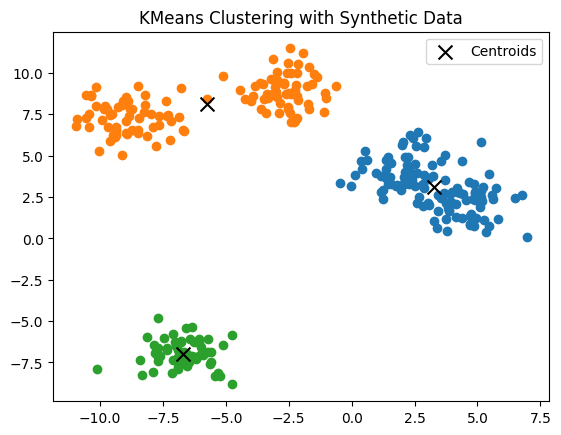

In [4]:
model = Kmeans(3)
model.fit(X)
index = model.forward(X)

for i in range(0, X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

### 2 cluster

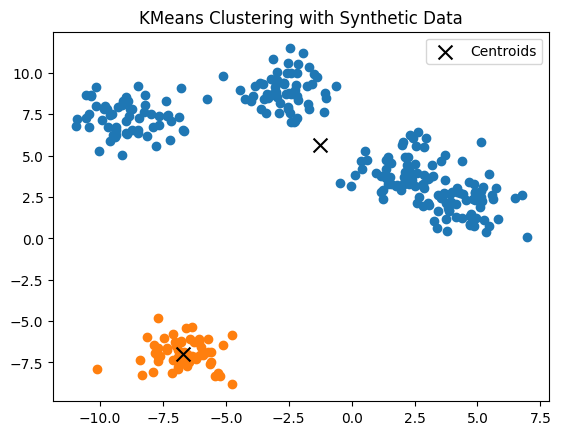

In [5]:
model = Kmeans(2)
model.fit(X)
index = model.forward(X)

for i in range(0, X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

### 4 cluster

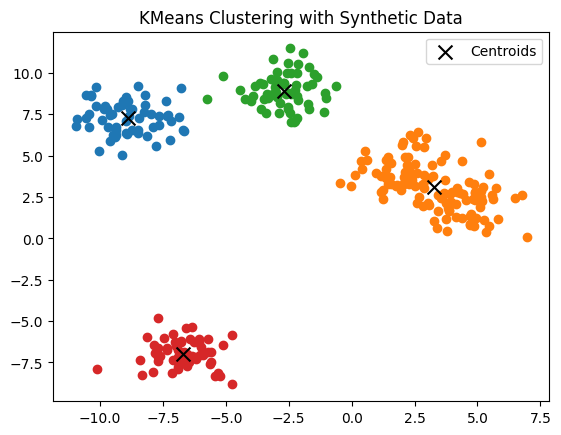

In [6]:
model = Kmeans(4)
model.fit(X)
index = model.forward(X)

for i in range(0, X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

## Error of K-Means algorithm
To find how big error in this algorihtm is we need to follow this 2 steps:
1.Write a function that takes the points and their corresponding clusters from the input, then the average distance for each cluster calculate the points belonging to the desired cluster up to the center of the cluster, this number is called the error number of each cluster.
#### And here is the explanation of this function:
For each cluster i, the function:
Identifies all points that belong to cluster i by using labels == i. This selects the subset of points that belong to that cluster after that computes the Euclidean distance between each point in the cluster and the cluster center using np.linalg.norm, which calculates the norm (distance) between points and their respective center.
Takes the mean of these distances to calculate the average distance for that cluster, which is considered the cluster's error and then returns a list containing the error (average distance to the center) for each cluster.

In [7]:
def calculate_cluster_error(points, labels, centers):
    errors = []
    for i in range(len(centers)):
        cluster_points = points[labels == i]
        cluster_error = np.mean(np.linalg.norm(cluster_points - centers[i], axis=1))
        errors.append(cluster_error)
    return errors

2. Write a function that takes the points and their corresponding clusters from the input and calculates the average error of the clusters as the error of the algorithm and returns it as an output.
#### And here is the explanation of this function:
Calls calculate_cluster_error to get the individual errors for all clusters and then takes the mean of these cluster errors using np.mean and at last return The overall mean error across all clusters, which represents the average deviation of points from their respective cluster centers.

In the end we use these functions to plot our diagram

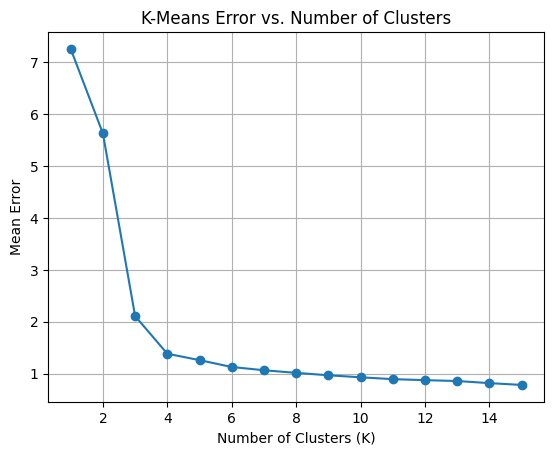

In [8]:
def calculate_mean_error(points, labels, centers):
    errors = calculate_cluster_error(points, labels, centers)
    return np.mean(errors)


errors = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    error = calculate_mean_error(X, labels, centers)
    errors.append(error)

plt.plot(k_values, errors, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Error')
plt.title('K-Means Error vs. Number of Clusters')
plt.grid('on')
plt.show()

### K-Means Limitation
now we use K-Means algorithm on the data below to show its limitation for 2, 3 and 4 clusters

#### Noisy Circles

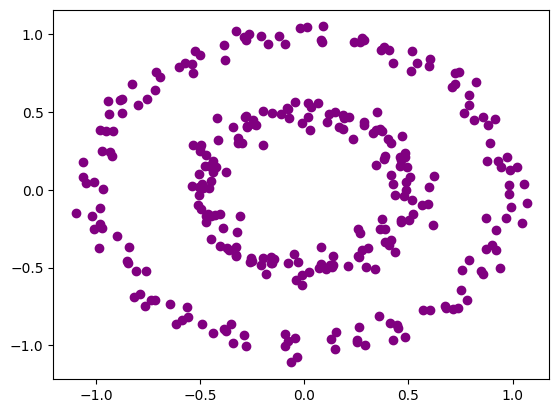

In [9]:
X_c, y_c = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
plt.scatter(X_c[:, 0], X_c[:, 1], color = 'purple')
plt.show()

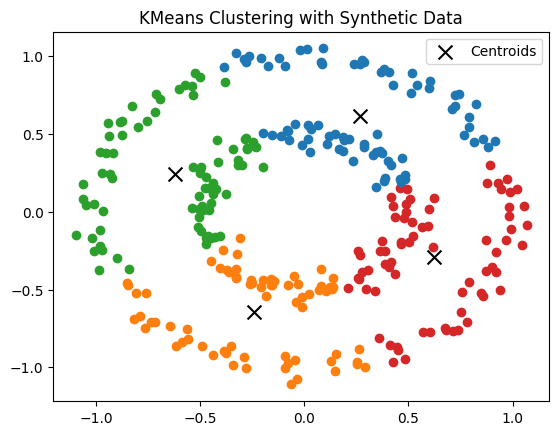

In [10]:
model = Kmeans(4)
model.fit(X_c)
index = model.forward(X_c)

for i in range(0, X_c.shape[0]):
    plt.scatter(X_c[i, 0], X_c[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

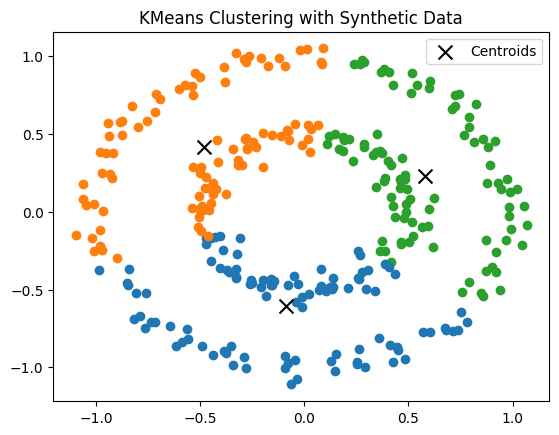

In [11]:
model = Kmeans(3)
model.fit(X_c)
index = model.forward(X_c)

for i in range(0, X_c.shape[0]):
    plt.scatter(X_c[i, 0], X_c[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

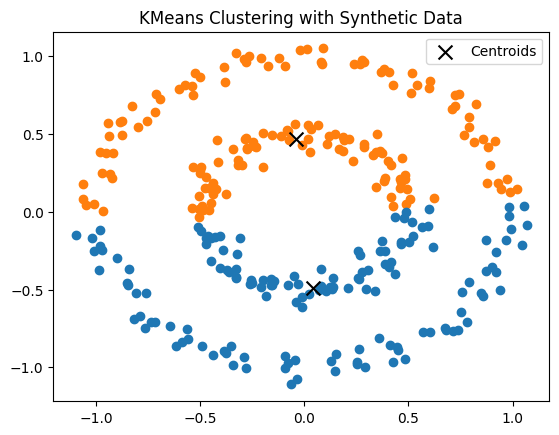

In [12]:
model = Kmeans(2)
model.fit(X_c)
index = model.forward(X_c)

for i in range(0, X_c.shape[0]):
    plt.scatter(X_c[i, 0], X_c[i, 1], c="C" + str(index[i]))

plt.scatter(model.centroid[:, 0], model.centroid[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('KMeans Clustering with Synthetic Data')
plt.legend()
plt.show()

## Reducing the size of the image by K-Mean
One of the applications of the mean-k algorithm is to reduce the size of a photo, and we want to use it to reduce the size of a selected photo.
For this, we do the following steps:
1. Load the image: Use the imread command to load an image (this will be in a folder provided to you). This will read the image into a three-dimensional array in Python.

2. Convert the 3D image array to a 2D array: You will convert the 3D array of the image (which represents pixels) into a 2D array. Each row in the 2D array will correspond to a pixel and its values for RGB channels.

3. Execute the K-Means algorithm: Run the K-Means algorithm with 16 clusters. Replace the RGB values of each pixel with the center of the cluster it belongs to. Then, reshape the array back into its original 3D form to visualize the reduced-size image.

And here is the code for this section:

4.10.0


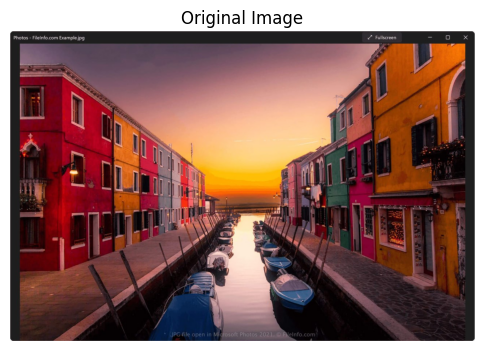

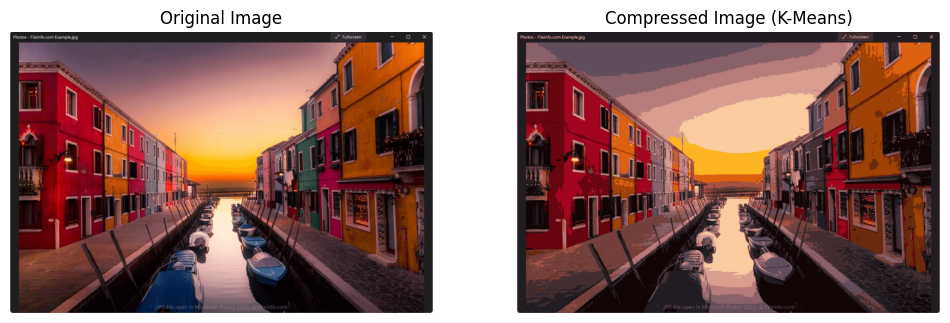

In [13]:
import cv2
print(cv2.__version__)


image = cv2.imread('CI4_sample_picture.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


pixels = image.reshape(-1, 3)


kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(pixels)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(pixels)


compressed_pixels = centroids[labels].astype(np.uint8)
compressed_image = compressed_pixels.reshape(image.shape)


plt.figure(figsize=(12,6))


plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title('Compressed Image (K-Means)')
plt.axis('off')

plt.show()